In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def generate_target_function():
    points = np.random.uniform(-1, 1, (2, 2))
    # Line parameters: ax + by + c = 0
    a = points[1, 1] - points[0, 1]
    b = points[0, 0] - points[1, 0]
    c = points[1, 0] * points[0, 1] - points[0, 0] * points[1, 1]
    return a, b, c


In [30]:
def target_function(a, b, c, x):
    return np.sign(a * x[:, 0] + b * x[:, 1] + c)

In [31]:
def target_function_calc(a, b, c, x):
    return a * x[:, 0] + b * x[:, 1] + c

In [32]:
def generate_data(N, a, b, c):
    X = np.random.uniform(-1, 1, (N, 2))
    y = target_function(a, b, c, X)
    return X, y

In [33]:
def perceptron_learning_algorithm(X, y):
    w = np.zeros(X.shape[1])
    b = 0
    iterations = 0

    while True:
        predictions = np.sign(np.dot(X, w) + b)
        misclassified = np.where(predictions != y)[0]
        if len(misclassified) == 0:
            break

        idx = np.random.choice(misclassified)
        w += y[idx] * X[idx]
        b += y[idx]
        iterations += 1

    return w, b, iterations

In [34]:
def calculate_disagreement(w, w_0, a, b, c, N=10000):
    X_test = np.random.uniform(-1, 1, (N, 2))
    y_test = target_function(a, b, c, X_test)
    y_pred = np.sign(np.dot(X_test, w) + w_0)
    disagreement = np.mean(y_test != y_pred)
    return disagreement, X_test, y_test

In [35]:
def experiment(num_runs, num_points):
    iterations_list = []
    disagreement_list = []

    for _ in range(num_runs):
        a, b, c = generate_target_function()
        X, y = generate_data(num_points, a, b, c)
        w, w_0, iterations = perceptron_learning_algorithm(X, y)
        disagreement, X_test, y_test = calculate_disagreement(w, w_0, a, b, c)

        iterations_list.append(iterations)
        disagreement_list.append(disagreement)

    return np.mean(iterations_list), np.mean(disagreement_list)

In [36]:

def plot_results(X, y, w, b, a, b_line, c_line):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    x_vals = np.linspace(-1, 1, 100)
    #y_vals = target_function_calc(a, b, c)
    plt.plot(x_vals, -(a / b_line) * x_vals - c_line / b_line, 'k-', label='Target Function')
    plt.plot(x_vals, -(w[0] / w[1]) * x_vals - b / w[1], 'g-', label='Learned Function')
    plt.legend()
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.show()


Média de iterações até a convergência: 10.373
Média de divergência entre f e g: 0.1095333


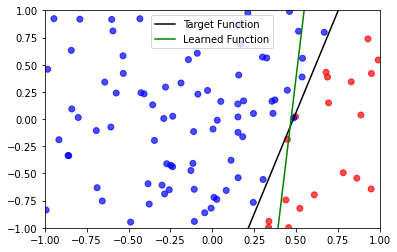

In [39]:
# Executar o experimento
num_runs = 1000
num_points = 10

mean_iterations, mean_disagreement = experiment(num_runs, num_points)
print(f"Média de iterações até a convergência: {mean_iterations}")
print(f"Média de divergência entre f e g: {mean_disagreement}")

# Plotar um exemplo
a, b, c = generate_target_function()
X, y = generate_data(num_points, a, b, c)
w, w_0, iterations = perceptron_learning_algorithm(X, y)

disagreement, X_test, y_test = calculate_disagreement(w, w_0, a, b, c)

plot_results(X_test[:100], y_test[:100], w, w_0, a, b, c)

Média de iterações até a convergência: 101.769
Média de divergência entre f e g: 0.013227100000000002


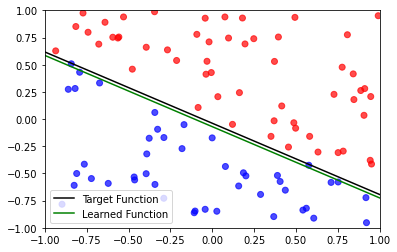

In [40]:
# Executar o experimento
num_runs = 1000
num_points = 100

mean_iterations, mean_disagreement = experiment(num_runs, num_points)
print(f"Média de iterações até a convergência: {mean_iterations}")
print(f"Média de divergência entre f e g: {mean_disagreement}")

# Plotar um exemplo
a, b, c = generate_target_function()
X, y = generate_data(num_points, a, b, c)
w, w_0, iterations = perceptron_learning_algorithm(X, y)

disagreement, X_test, y_test = calculate_disagreement(w, w_0, a, b, c)

plot_results(X_test[:100], y_test[:100], w, w_0, a, b, c)